# Data Aquisition


## Import Libraries

In [1]:
from google.colab import files
uploaded = files.upload()

Saving data_loader.py to data_loader.py


In [2]:
!pip install ucimlrepo

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from data_loader import load_online_retail_data

# Optional: Set the aesthetic style of the plots
sns.set_theme(style="whitegrid")

## Load the data

In [4]:
df = load_online_retail_data()

{'uci_id': 352, 'name': 'Online Retail', 'repository_url': 'https://archive.ics.uci.edu/dataset/352/online+retail', 'data_url': 'https://archive.ics.uci.edu/static/public/352/data.csv', 'abstract': 'This is a transactional data set which contains all the transactions occurring between 01/12/2010 and 09/12/2011 for a UK-based and registered non-store online retail.', 'area': 'Business', 'tasks': ['Classification', 'Clustering'], 'characteristics': ['Multivariate', 'Sequential', 'Time-Series'], 'num_instances': 541909, 'num_features': 6, 'feature_types': ['Integer', 'Real'], 'demographics': [], 'target_col': None, 'index_col': ['InvoiceNo', 'StockCode'], 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 2015, 'last_updated': 'Mon Oct 21 2024', 'dataset_doi': '10.24432/C5BW33', 'creators': ['Daqing Chen'], 'intro_paper': {'ID': 361, 'type': 'NATIVE', 'title': 'Data mining for the online retail industry: A case study of RFM model-based customer segmenta

# Data Cleaning for Online Retail Dataset

This part notebook focuses on cleaning our dataset for the Online Retail Project. We will perform thorough cleaning steps to prepare the data for analysis.

---

## 1. Initial Overview of the Dataset

Let’s start by displaying a summary of the data to identify initial cleaning requirements.


In [5]:
# Display the basic info and descriptive statistics

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [6]:
df.describe(include='all')

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
count,541909,541909,540455,541909.000000,541909,541909.000000,406829.000000,541909
unique,25900,4070,4223,NaN,23260,NaN,NaN,38
top,573585,85123A,WHITE HANGING HEART T-LIGHT HOLDER,NaN,10/31/2011 14:41,NaN,NaN,United Kingdom
freq,1114,2313,2369,NaN,1114,NaN,NaN,495478
mean,NaN,NaN,NaN,9.552250,NaN,4.611114,15287.690570,NaN
std,NaN,NaN,NaN,218.081158,NaN,96.759853,1713.600303,NaN
min,NaN,NaN,NaN,-80995.000000,NaN,-11062.060000,12346.000000,NaN
25%,NaN,NaN,NaN,1.000000,NaN,1.250000,13953.000000,NaN
50%,NaN,NaN,NaN,3.000000,NaN,2.080000,15152.000000,NaN
75%,NaN,NaN,NaN,10.000000,NaN,4.130000,16791.000000,NaN


In [7]:
df.head()


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


## 2. Handling Missing Values

From the initial summary, we observe:
- `CustomerID` and `Description` columns contain missing values.
- We will address these missing values as they impact our analysis.

### 2.1 Missing `CustomerID` Values

`CustomerID` is crucial for customer segmentation and clustering. Since it's missing in several rows, we will:
1. Drop transactions without a `CustomerID`, as they do not contribute to customer-based analysis.
2. Confirm the remaining data for further analysis.


In [8]:
# Drop rows where CustomerID is missing
df = df.dropna(subset=['CustomerID'])

# Confirm the number of remaining rows
print(f"Remaining rows after dropping missing CustomerID: {len(df)}")


Remaining rows after dropping missing CustomerID: 406829


### 2.2 Missing `Description` Values

`Description` is essential for association rule learning. We will:
1. Drop rows where `Description` is missing, as these provide no information about the products sold.


In [9]:
# Drop rows where Description is missing
df = df.dropna(subset=['Description'])

# Confirm the number of remaining rows
print(f"Remaining rows after dropping missing CustomerID: {len(df)}")

# Verify there are no missing values left in CustomerID and Description
print(df.isnull().sum())


Remaining rows after dropping missing CustomerID: 406829
InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64


## 3. Removing Duplicate Entries

Duplicate transactions could affect our analysis of sales trends. We will:
1. Identify any duplicate rows based on all columns.
2. Drop duplicates to ensure each transaction is unique.

In [10]:
# Check for duplicates
print(f"Number of duplicate rows: {df.duplicated().sum()}")

# Drop duplicate rows
df = df.drop_duplicates()

# Confirm duplicates are removed
print(f"Number of rows after removing duplicates: {len(df)}")

Number of duplicate rows: 5225
Number of rows after removing duplicates: 401604


## 4. Filtering Canceled Transactions

Canceled transactions are indicated by an InvoiceNo starting with 'C'. Since canceled transactions don't contribute to our analysis of sales patterns, we will:
1. Filter out rows where `InvoiceNo` starts with 'C'.
2. Confirm these rows are excluded.

In [11]:
# Ensure the column name is exactly as expected (case-sensitive)
df.columns = df.columns.str.strip()  # Remove any whitespace around column names

# Now filtering out canceled transactions
df = df[~df['InvoiceNo'].astype(str).str.startswith('C')]

# Confirm the result
print(f"Number of transactions after removing canceled orders: {len(df)}")

Number of transactions after removing canceled orders: 392732


## 5. Converting Data Types

### 5.1 Converting `CustomerID` to Integer

Since `CustomerID` is a unique identifier, we will convert it from float to integer for consistency.

In [12]:
# Convert CustomerID to integer
df['CustomerID'] = df['CustomerID'].astype(int)

<ipython-input-12-2a41eaa96f25>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['CustomerID'] = df['CustomerID'].astype(int)


### 5.2 Converting `InvoiceDate` to DateTime

To analyze sales trends over time, `InvoiceDate` should be in DateTime format. We will:
1. Convert `InvoiceDate` to DateTime.
2. Extract the date and time components for additional time-based analysis if needed.

In [13]:
# Convert InvoiceDate to datetime format
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

# Extract year, month, day, and hour for further time-based analysis
df['InvoiceYear'] = df['InvoiceDate'].dt.year
df['InvoiceMonth'] = df['InvoiceDate'].dt.month
df['InvoiceDay'] = df['InvoiceDate'].dt.day
df['InvoiceHour'] = df['InvoiceDate'].dt.hour

## 6. Handling Negative and Zero Quantities and Prices

### 6.1 Removing Negative Quantities and Prices

Negative values in `Quantity` and `UnitPrice` are likely errors or adjustments. We will:
1. Filter out transactions with `Quantity` and `UnitPrice` less than or equal to zero.
2. Confirm the removal.

In [14]:
# Remove rows where Quantity or UnitPrice is less than or equal to zero
df = df[(df['Quantity'] > 0) & (df['UnitPrice'] > 0)]

# Confirm no negative or zero values remain
print(f"Remaining rows after removing negative and zero quantities/prices: {len(df)}")

Remaining rows after removing negative and zero quantities/prices: 392692


## 7. Feature Engineering: Creating Total Price Column

To facilitate analysis of revenue per transaction, we will create a new feature:
- `TotalPrice` = `Quantity` * `UnitPrice`

In [15]:
# Create a TotalPrice column
df['TotalPrice'] = df['Quantity'] * df['UnitPrice']

<ipython-input-15-da1cd46ce1f1>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['TotalPrice'] = df['Quantity'] * df['UnitPrice']


## 8. Handling Outliers

### 8.1 Identifying Outliers in `Quantity` and `UnitPrice`

To ensure a robust analysis, we will:
1. Examine the distributions of `Quantity` and `UnitPrice`.
2. Define thresholds and remove extreme outliers, as they may be data entry errors.

In [16]:
# Define thresholds for Quantity and UnitPrice based on quantiles
quantity_threshold = df['Quantity'].quantile(0.99)
price_threshold = df['UnitPrice'].quantile(0.99)

# Filter out extreme outliers
df = df[(df['Quantity'] <= quantity_threshold) & (df['UnitPrice'] <= price_threshold)]

# Confirm data shape after removing outliers
print(f"Remaining rows after removing outliers: {len(df)}")

Remaining rows after removing outliers: 385081


## Final Dataset Overview

After cleaning, let's take a final look at the dataset.
- Summary of columns
- Final dataset shape

In [17]:
# Display final info, description, and head of cleaned data
print(df.info())
print(df.describe())
print(df.head())

<class 'pandas.core.frame.DataFrame'>
Index: 385081 entries, 0 to 541908
Data columns (total 13 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   InvoiceNo     385081 non-null  object        
 1   StockCode     385081 non-null  object        
 2   Description   385081 non-null  object        
 3   Quantity      385081 non-null  int64         
 4   InvoiceDate   385081 non-null  datetime64[ns]
 5   UnitPrice     385081 non-null  float64       
 6   CustomerID    385081 non-null  int64         
 7   Country       385081 non-null  object        
 8   InvoiceYear   385081 non-null  int32         
 9   InvoiceMonth  385081 non-null  int32         
 10  InvoiceDay    385081 non-null  int32         
 11  InvoiceHour   385081 non-null  int32         
 12  TotalPrice    385081 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int32(4), int64(2), object(4)
memory usage: 35.3+ MB
None
           Quantity             

# Data Integration and Transformation for Online Retail Dataset

This part notebook focuses on integrating and transforming the cleaned dataset for our Online Retail Project. We will perform detailed steps to integrate and transform data, preparing it for more advanced analysis.

---

## 9. Data Integration

Data integration combines relevant data sources and unifies different data types for consistency. Since we’re working with a single dataset, our primary integration tasks include ensuring that data types are consistent and that similar information is merged meaningfully.


In [18]:
# Check current data types and any inconsistencies
print(df.dtypes)

InvoiceNo               object
StockCode               object
Description             object
Quantity                 int64
InvoiceDate     datetime64[ns]
UnitPrice              float64
CustomerID               int64
Country                 object
InvoiceYear              int32
InvoiceMonth             int32
InvoiceDay               int32
InvoiceHour              int32
TotalPrice             float64
dtype: object


### 9.1 Ensuring Consistency in `InvoiceNo` and `StockCode`

- `InvoiceNo` and `StockCode` should be categorical.
- We will convert them to `string` types if they’re not already, making it easier to handle categorical data during analysis.


In [19]:
# Convert InvoiceNo and StockCode to string to maintain consistency in ID handling
df['InvoiceNo'] = df['InvoiceNo'].astype(str)
df['StockCode'] = df['StockCode'].astype(str)

### 9.2 Creating Unique Identifiers for Each Transaction and Customer

To facilitate further analysis, we will:
1. Create a `TransactionID` column by combining `InvoiceNo` and `StockCode`.
2. Create a `CustomerTransactionID` by combining `CustomerID` and `InvoiceDate`.

These new identifiers can help in tracking each transaction uniquely and distinguishing customer-based transactions.

In [20]:
# Create unique identifiers
df['TransactionID'] = df['InvoiceNo'] + '_' + df['StockCode']
df['CustomerTransactionID'] = df['CustomerID'].astype(str) + '_' + df['InvoiceDate'].astype(str)

# Display the first few rows to verify the new columns
df[['TransactionID', 'CustomerTransactionID']].head()

,TransactionID,CustomerTransactionID
0,536365_85123A,17850_2010-12-01 08:26:00
1,536365_71053,17850_2010-12-01 08:26:00
2,536365_84406B,17850_2010-12-01 08:26:00
3,536365_84029G,17850_2010-12-01 08:26:00
4,536365_84029E,17850_2010-12-01 08:26:00


## 10. Data Transformation

Data transformation involves modifying data columns, adjusting values, and creating new features to enhance the dataset’s analytical power.

### 10.1 Dropping Unnecessary Columns

Since we have added `TransactionID` and `CustomerTransactionID`, we can remove `InvoiceNo` and `StockCode` for a cleaner dataset.


In [21]:
# Drop the original InvoiceNo and StockCode columns
df.drop(columns=['InvoiceNo', 'StockCode'], inplace=True)

# Confirm the columns have been removed
print(df.columns)

Index(['Description', 'Quantity', 'InvoiceDate', 'UnitPrice', 'CustomerID',
       'Country', 'InvoiceYear', 'InvoiceMonth', 'InvoiceDay', 'InvoiceHour',
       'TotalPrice', 'TransactionID', 'CustomerTransactionID'],
      dtype='object')


### 10.2 Transforming Dates for Time-Based Analysis

To support time series and seasonal analysis, we will:
1. Create additional time-based columns for `Day of the Week`, `Week of the Year`, and `Quarter`.
2. Convert `InvoiceDate` into separate columns for `Year-Month` to assist in monthly trend analysis.

In [22]:
# Create additional time-based columns
df['DayOfWeek'] = df['InvoiceDate'].dt.day_name()
df['WeekOfYear'] = df['InvoiceDate'].dt.isocalendar().week
df['Quarter'] = df['InvoiceDate'].dt.quarter
df['YearMonth'] = df['InvoiceDate'].dt.to_period('M')

# Display the head of the DataFrame to confirm new time-based features
df[['InvoiceDate', 'DayOfWeek', 'WeekOfYear', 'Quarter', 'YearMonth']].head()


,InvoiceDate,DayOfWeek,WeekOfYear,Quarter,YearMonth
0,2010-12-01 08:26:00,Wednesday,48,4,2010-12
1,2010-12-01 08:26:00,Wednesday,48,4,2010-12
2,2010-12-01 08:26:00,Wednesday,48,4,2010-12
3,2010-12-01 08:26:00,Wednesday,48,4,2010-12
4,2010-12-01 08:26:00,Wednesday,48,4,2010-12


### 10.3 Converting Price Data to Other Currencies

We will convert `UnitPrice` from GBP to USD for global analysis (assuming a conversion rate of 1 GBP = 1.27 USD).

In [23]:
# Add USD prices using a conversion rate
conversion_rate = 1.27
df['UnitPrice_USD'] = df['UnitPrice'] * conversion_rate
df['TotalPrice_USD'] = df['TotalPrice'] * conversion_rate

# Display the converted prices
df[['UnitPrice', 'UnitPrice_USD', 'TotalPrice', 'TotalPrice_USD']].head()


,UnitPrice,UnitPrice_USD,TotalPrice,TotalPrice_USD
0,2.55,3.2385,15.30,19.4310
1,3.39,4.3053,20.34,25.8318
2,2.75,3.4925,22.00,27.9400
3,3.39,4.3053,20.34,25.8318
4,3.39,4.3053,20.34,25.8318


### 10.4 Binning Quantity to Classify Order Size

To categorize transactions, we will classify `Quantity` into bins that represent small, medium, and large orders. This will provide insights into order sizes.


In [24]:
# Define bins and labels for Quantity
bins = [0, 5, 20, df['Quantity'].max()]
labels = ['Small Order', 'Medium Order', 'Large Order']
df['OrderSize'] = pd.cut(df['Quantity'], bins=bins, labels=labels)

# Display order size classifications
df[['Quantity', 'OrderSize']].head(10)


,Quantity,OrderSize
0,6,Medium Order
1,6,Medium Order
2,8,Medium Order
3,6,Medium Order
4,6,Medium Order
5,2,Small Order
6,6,Medium Order
7,6,Medium Order
8,6,Medium Order
9,32,Large Order


### 10.5 Aggregating Data for Customer Analysis

To prepare for customer-level analysis, we will:
1. Calculate the `TotalAmountSpent` per customer.
2. Calculate the `AveragePurchaseValue` and `PurchaseFrequency` for each customer.

These transformations provide insight into customer value and purchasing behavior.


In [25]:
# Calculate total amount spent by each customer
customer_spending = df.groupby('CustomerID')['TotalPrice'].sum().reset_index()
customer_spending.rename(columns={'TotalPrice': 'TotalAmountSpent'}, inplace=True)

# Calculate average purchase value and purchase frequency per customer
customer_purchase_avg = df.groupby('CustomerID')['TotalPrice'].mean().reset_index()
customer_purchase_avg.rename(columns={'TotalPrice': 'AveragePurchaseValue'}, inplace=True)

purchase_frequency = df.groupby('CustomerID')['CustomerTransactionID'].nunique().reset_index()
purchase_frequency.rename(columns={'CustomerTransactionID': 'PurchaseFrequency'}, inplace=True)

# Merge these metrics back into the main DataFrame
df = pd.merge(df, customer_spending, on='CustomerID', how='left')
df = pd.merge(df, customer_purchase_avg, on='CustomerID', how='left')
df = pd.merge(df, purchase_frequency, on='CustomerID', how='left')

# Display sample customer data with new features
df[['CustomerID', 'TotalAmountSpent', 'AveragePurchaseValue', 'PurchaseFrequency']].drop_duplicates().head()

,CustomerID,TotalAmountSpent,AveragePurchaseValue,PurchaseFrequency
0,17850,4783.46,16.551765,33
9,13047,3237.54,18.822907,9
26,12583,6503.33,28.649031,15
45,13748,948.25,33.866071,4
64,15100,876.00,292.000000,3


### Save Dataset to CSV for the next steps

In [26]:
# Save the cleaned, integrated, and transformed dataset to a CSV file
import os
os.makedirs('dataset', exist_ok=True)
df.to_csv('dataset/cleaned_online_retail_data.csv', index=False)

# Confirm the file was saved by checking the first few lines of the CSV
saved_df = pd.read_csv('dataset/cleaned_online_retail_data.csv')
print(saved_df.head())

                           Description  Quantity          InvoiceDate  \
0   WHITE HANGING HEART T-LIGHT HOLDER         6  2010-12-01 08:26:00   
1                  WHITE METAL LANTERN         6  2010-12-01 08:26:00   
2       CREAM CUPID HEARTS COAT HANGER         8  2010-12-01 08:26:00   
3  KNITTED UNION FLAG HOT WATER BOTTLE         6  2010-12-01 08:26:00   
4       RED WOOLLY HOTTIE WHITE HEART.         6  2010-12-01 08:26:00   

   UnitPrice  CustomerID         Country  InvoiceYear  InvoiceMonth  \
0       2.55       17850  United Kingdom         2010            12   
1       3.39       17850  United Kingdom         2010            12   
2       2.75       17850  United Kingdom         2010            12   
3       3.39       17850  United Kingdom         2010            12   
4       3.39       17850  United Kingdom         2010            12   

   InvoiceDay  InvoiceHour  ...  DayOfWeek WeekOfYear Quarter YearMonth  \
0           1            8  ...  Wednesday         48      

### 10.6 Encoding Categorical Data

For machine learning models, we may need numerical encodings for categorical columns like `Country` and `DayOfWeek`. Here, we will apply one-hot encoding to these columns.


In [27]:
# Apply one-hot encoding to Country and DayOfWeek columns
df_encoded = pd.get_dummies(df, columns=['Country', 'DayOfWeek'], drop_first=True)

# Display the encoded DataFrame to confirm
df_encoded.head()

,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,InvoiceYear,InvoiceMonth,InvoiceDay,InvoiceHour,TotalPrice,...,Country_Switzerland,Country_USA,Country_United Arab Emirates,Country_United Kingdom,Country_Unspecified,DayOfWeek_Monday,DayOfWeek_Sunday,DayOfWeek_Thursday,DayOfWeek_Tuesday,DayOfWeek_Wednesday
0,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,2010,12,1,8,15.30,...,False,False,False,True,False,False,False,False,False,True
1,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,2010,12,1,8,20.34,...,False,False,False,True,False,False,False,False,False,True
2,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,2010,12,1,8,22.00,...,False,False,False,True,False,False,False,False,False,True
3,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,2010,12,1,8,20.34,...,False,False,False,True,False,False,False,False,False,True
4,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,2010,12,1,8,20.34,...,False,False,False,True,False,False,False,False,False,True


### Final Dataset Summary

With these transformations, our dataset is now enriched with new features and ready for further analysis. Let’s display a summary to confirm the structure and the newly created columns.

In [28]:
# Display the final structure of the transformed DataFrame
print(df_encoded.info())
print(df_encoded.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 385081 entries, 0 to 385080
Data columns (total 62 columns):
 #   Column                        Non-Null Count   Dtype         
---  ------                        --------------   -----         
 0   Description                   385081 non-null  object        
 1   Quantity                      385081 non-null  int64         
 2   InvoiceDate                   385081 non-null  datetime64[ns]
 3   UnitPrice                     385081 non-null  float64       
 4   CustomerID                    385081 non-null  int64         
 5   InvoiceYear                   385081 non-null  int32         
 6   InvoiceMonth                  385081 non-null  int32         
 7   InvoiceDay                    385081 non-null  int32         
 8   InvoiceHour                   385081 non-null  int32         
 9   TotalPrice                    385081 non-null  float64       
 10  TransactionID                 385081 non-null  object        
 11  CustomerTrans

In [55]:
!pip install --upgrade mlxtend

In [56]:
import mlxtend
print(f"mlxtend version: {mlxtend.__version__}")

mlxtend version: 0.23.3


In [67]:
from mlxtend.frequent_patterns import apriori

# Load the specified dataset
df = pd.read_csv('dataset/cleaned_online_retail_data.csv')

# Sample the data
df_sampled = df.sample(frac=0.1, random_state=42)

# Define batch processing function
def process_batch(batch):
    pivot_table = pd.pivot_table(
        data=batch,
        values='Quantity',
        index='TransactionID',
        columns='Description',
        aggfunc='sum'
    ).fillna(0)
    pivot_table = pivot_table.apply(lambda col: col.map(lambda x: 1 if x > 0 else 0))
    return pivot_table

# Process data in batches
batch_size = 5000
baskets = []
for i in range(0, len(df_sampled), batch_size):
    batch = df_sampled.iloc[i:i + batch_size]
    baskets.append(process_batch(batch))

basket = pd.concat(baskets, axis=0)
basket = basket.fillna(False).astype(bool)

# Apply Apriori
frequent_itemsets = apriori(basket, min_support=0.005, use_colnames=True)
if frequent_itemsets.empty:
    frequent_itemsets = apriori(basket, min_support=0.001, use_colnames=True)

# Ensure itemsets are frozensets
frequent_itemsets['itemsets'] = frequent_itemsets['itemsets'].apply(frozenset)

# Function to compute association rules
def compute_association_rules(frequent_itemsets, min_confidence=0.5):
    rules_list = []
    frequent_itemsets_dict = {
        frozenset(item): support for item, support in zip(frequent_itemsets['itemsets'], frequent_itemsets['support'])
    }

    for _, row in frequent_itemsets.iterrows():
        items = row['itemsets']
        support = row['support']

        if len(items) > 1:
            for item in items:
                antecedent = frozenset([item])
                consequent = items - antecedent

                antecedent_support = frequent_itemsets_dict.get(antecedent, 0)
                consequent_support = frequent_itemsets_dict.get(consequent, 0)

                if antecedent_support > 0:
                    confidence = support / antecedent_support
                    lift = confidence / consequent_support if consequent_support > 0 else 0

                    if confidence >= min_confidence:
                        rules_list.append({
                            'antecedent': antecedent,
                            'consequent': consequent,
                            'support': support,
                            'confidence': confidence,
                            'lift': lift
                        })
    return pd.DataFrame(rules_list)

# Compute association rules
rules_df = compute_association_rules(frequent_itemsets)
if rules_df.empty:
    print("No association rules found.")
else:
    print("High-confidence Association Rules:")
    print(rules_df.sort_values('confidence', ascending=False).head())


No association rules found.


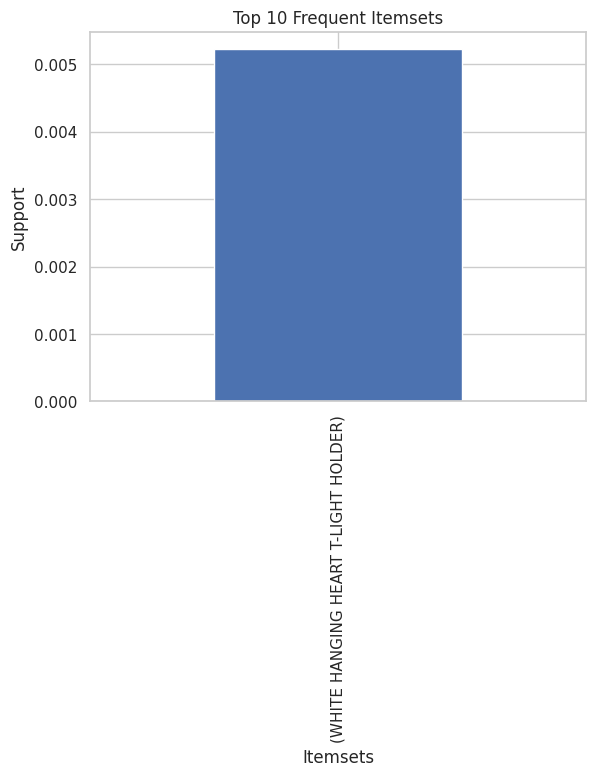

In [68]:
# Visualization
if not frequent_itemsets.empty:
    frequent_itemsets.head(10).plot(kind='bar', x='itemsets', y='support', legend=False)
    plt.title('Top 10 Frequent Itemsets')
    plt.ylabel('Support')
    plt.xlabel('Itemsets')
    plt.show()

if not rules_df.empty:
    plt.scatter(rules_df['confidence'], rules_df['lift'], alpha=0.6)
    plt.title('Confidence vs. Lift')
    plt.xlabel('Confidence')
    plt.ylabel('Lift')
    plt.show()